In [1]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f: # opens the style.json file
    style: dict = json.load(f) # loads as a dictionary object

In [3]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='2023_09_06 PTII data.xlsx'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_excel(raw_data_filename) # read data into a pandas dataframe

# Output data
raw_data

,Time (min),"p(TII-2,6ND)-recycled",Time,"p(TII-2,6ND) pristine",p(TII-PD),p(TII-PD) recycled
0,0.00000,0.000,0.00000,0.029,-0.035,-0.053
1,0.00167,-0.012,0.00167,0.021,-0.024,-0.045
2,0.00333,-0.026,0.00333,0.011,-0.012,-0.046
3,0.00500,-0.036,0.00500,0.004,-0.006,-0.054
4,0.00667,-0.039,0.00667,0.004,-0.010,-0.067
...,...,...,...,...,...,...
44996,NaN,NaN,74.99333,-0.010,-0.927,NaN
44997,NaN,NaN,74.99500,-0.024,-0.916,NaN
44998,NaN,NaN,74.99667,-0.035,-0.908,NaN
44999,NaN,NaN,74.99833,-0.037,-0.907,NaN


In [5]:
# Data preprocessing 
# Baseline correction
def preprocess(data: pd.DataFrame):

    # Normalize RI values
    col: str = "p(TII-2,6ND)-recycled"
    max_val: float = data[col].max() # get the maximum value of the absorbance column
    data[col] = data[col] / max_val # divide all values in the absorbance column by the maximum value to normalize the data
    return data

preprocessed_data_ND_recycled: pd.DataFrame = preprocess(raw_data) # preprocess the data using the function defined above
preprocessed_data_ND_recycled

,Time (min),"p(TII-2,6ND)-recycled",Time,"p(TII-2,6ND) pristine",p(TII-PD),p(TII-PD) recycled
0,0.00000,0.000000,0.00000,0.029,-0.035,-0.053
1,0.00167,-0.000860,0.00167,0.021,-0.024,-0.045
2,0.00333,-0.001864,0.00333,0.011,-0.012,-0.046
3,0.00500,-0.002581,0.00500,0.004,-0.006,-0.054
4,0.00667,-0.002796,0.00667,0.004,-0.010,-0.067
...,...,...,...,...,...,...
44996,NaN,NaN,74.99333,-0.010,-0.927,NaN
44997,NaN,NaN,74.99500,-0.024,-0.916,NaN
44998,NaN,NaN,74.99667,-0.035,-0.908,NaN
44999,NaN,NaN,74.99833,-0.037,-0.907,NaN


In [6]:
# Data preprocessing 
# Baseline correction
def preprocess(data: pd.DataFrame):

    # Normalize RI values
    col: str = "p(TII-2,6ND) pristine"
    max_val: float = data[col].max() # get the maximum value of the absorbance column
    data[col] = data[col] / max_val # divide all values in the absorbance column by the maximum value to normalize the data
    return data

preprocessed_data_ND_pristine: pd.DataFrame = preprocess(preprocessed_data_ND_recycled) # preprocess the data using the function defined above
preprocessed_data_ND_pristine

,Time (min),"p(TII-2,6ND)-recycled",Time,"p(TII-2,6ND) pristine",p(TII-PD),p(TII-PD) recycled
0,0.00000,0.000000,0.00000,0.001074,-0.035,-0.053
1,0.00167,-0.000860,0.00167,0.000777,-0.024,-0.045
2,0.00333,-0.001864,0.00333,0.000407,-0.012,-0.046
3,0.00500,-0.002581,0.00500,0.000148,-0.006,-0.054
4,0.00667,-0.002796,0.00667,0.000148,-0.010,-0.067
...,...,...,...,...,...,...
44996,NaN,NaN,74.99333,-0.000370,-0.927,NaN
44997,NaN,NaN,74.99500,-0.000888,-0.916,NaN
44998,NaN,NaN,74.99667,-0.001296,-0.908,NaN
44999,NaN,NaN,74.99833,-0.001370,-0.907,NaN


In [7]:
# Data preprocessing 
# Baseline correction
def preprocess(data: pd.DataFrame):

    # Normalize RI values
    col: str = "p(TII-PD)"
    max_val: float = data[col].max() # get the maximum value of the absorbance column
    data[col] = data[col] / max_val # divide all values in the absorbance column by the maximum value to normalize the data
    return data

preprocessed_data_ND_pristine: pd.DataFrame = preprocess(preprocessed_data_ND_pristine) # preprocess the data using the function defined above
preprocessed_data_ND_pristine

,Time (min),"p(TII-2,6ND)-recycled",Time,"p(TII-2,6ND) pristine",p(TII-PD),p(TII-PD) recycled
0,0.00000,0.000000,0.00000,0.001074,-0.001954,-0.053
1,0.00167,-0.000860,0.00167,0.000777,-0.001340,-0.045
2,0.00333,-0.001864,0.00333,0.000407,-0.000670,-0.046
3,0.00500,-0.002581,0.00500,0.000148,-0.000335,-0.054
4,0.00667,-0.002796,0.00667,0.000148,-0.000558,-0.067
...,...,...,...,...,...,...
44996,NaN,NaN,74.99333,-0.000370,-0.051744,NaN
44997,NaN,NaN,74.99500,-0.000888,-0.051130,NaN
44998,NaN,NaN,74.99667,-0.001296,-0.050684,NaN
44999,NaN,NaN,74.99833,-0.001370,-0.050628,NaN


In [8]:
#Convert to pivot table for easier graphing
raw_TII_ND = pd.melt(raw_data, id_vars=['Time (min)'], value_vars=['p(TII-2,6ND) pristine','p(TII-2,6ND)-recycled'])
TII_ND = raw_TII_ND.rename(columns={'variable': 'polymer sample', 'value': 'RI (mV)'})
TII_ND 

,Time (min),polymer sample,RI (mV)
0,0.00000,"p(TII-2,6ND) pristine",0.001074
1,0.00167,"p(TII-2,6ND) pristine",0.000777
2,0.00333,"p(TII-2,6ND) pristine",0.000407
3,0.00500,"p(TII-2,6ND) pristine",0.000148
4,0.00667,"p(TII-2,6ND) pristine",0.000148
...,...,...,...
89997,NaN,"p(TII-2,6ND)-recycled",NaN
89998,NaN,"p(TII-2,6ND)-recycled",NaN
89999,NaN,"p(TII-2,6ND)-recycled",NaN
90000,NaN,"p(TII-2,6ND)-recycled",NaN


In [10]:
# Data preprocessing 
# Baseline correction
def preprocess(data: pd.DataFrame):

    # Normalize RI values
    col: str = "RI (mV)"
    max_val: float = data[col].max() # get the maximum value of the absorbance column
    data[col] = data[col] / max_val # divide all values in the absorbance column by the maximum value to normalize the data
    return data

preprocessed_data_ND: pd.DataFrame = preprocess(TII_ND) # preprocess the data using the function defined above
preprocessed_data_ND

,Time (min),polymer sample,RI (mV)
0,0.00000,"p(TII-2,6ND) pristine",0.001074
1,0.00167,"p(TII-2,6ND) pristine",0.000777
2,0.00333,"p(TII-2,6ND) pristine",0.000407
3,0.00500,"p(TII-2,6ND) pristine",0.000148
4,0.00667,"p(TII-2,6ND) pristine",0.000148
...,...,...,...
89997,NaN,"p(TII-2,6ND)-recycled",NaN
89998,NaN,"p(TII-2,6ND)-recycled",NaN
89999,NaN,"p(TII-2,6ND)-recycled",NaN
90000,NaN,"p(TII-2,6ND)-recycled",NaN


In [ ]:
#Convert to pivot table for easier graphing
raw_TII_PD = pd.melt(raw_data, id_vars=['Time (min)'], value_vars=['p(TII-PD)','p(TII-PD) recycled'])
TII_PD = raw_TII_PD.rename(columns={'variable': 'polymer sample', 'value': 'RI (mV)'})
TII_PD 

,Time (min),polymer sample,RI (mV)
0,0.00000,p(TII-PD),-0.035
1,0.00167,p(TII-PD),-0.024
2,0.00333,p(TII-PD),-0.012
3,0.00500,p(TII-PD),-0.006
4,0.00667,p(TII-PD),-0.010
...,...,...,...
89997,NaN,p(TII-PD) recycled,NaN
89998,NaN,p(TII-PD) recycled,NaN
89999,NaN,p(TII-PD) recycled,NaN
90000,NaN,p(TII-PD) recycled,NaN


In [ ]:
# Data preprocessing 
# Baseline correction
def preprocess(data: pd.DataFrame):

    # Normalize RI values
    col: str = "RI (mV)"
    max_val: float = data[col].max() # get the maximum value of the absorbance column
    data[col] = data[col] / max_val # divide all values in the absorbance column by the maximum value to normalize the data
    return data

preprocessed_data_PD: data = preprocess(TII_PD) # preprocess the data using the function defined above
preprocessed_data_PD

,Time (min),polymer sample,RI (mV)
0,0.00000,p(TII-PD),0.036938
1,0.00167,p(TII-PD),0.037306
2,0.00333,p(TII-PD),0.037709
3,0.00500,p(TII-PD),0.037910
4,0.00667,p(TII-PD),0.037776
...,...,...,...
89997,NaN,p(TII-PD) recycled,NaN
89998,NaN,p(TII-PD) recycled,NaN
89999,NaN,p(TII-PD) recycled,NaN
90000,NaN,p(TII-PD) recycled,NaN


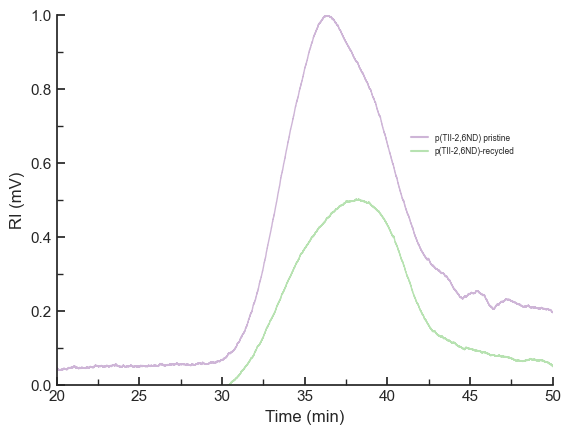

In [ ]:
# Plot the data!
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data_ND, # refers to dataframe that contains the data
    x="Time (min)", # refers to column header to get all the X data
    y="RI (mV)", # refers to column header to get all the Y data
    hue="polymer sample",
    palette="PRGn",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)

sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X-axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y-axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(20, 50)
# NOTE: User can change the y limits here
plt.ylim(0, 1)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("GPC traces of p(TII-2,6ND) pristine and recycled.svg", dpi=300, bbox_inches="tight")
plt.savefig("GPC traces of p(TII-2,6ND) pristine and recycled.jpg", dpi=300, bbox_inches="tight")

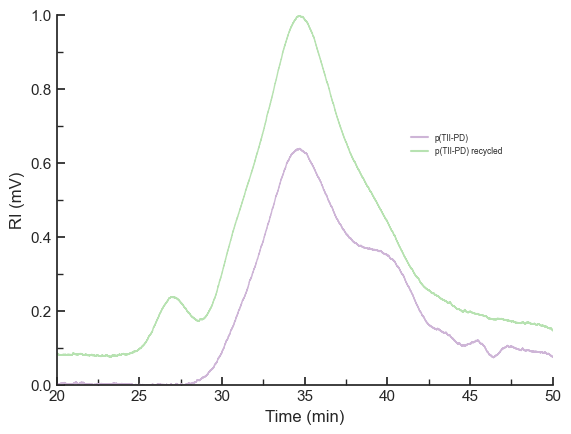

In [ ]:
# Plot the data!
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data_PD, # refers to dataframe that contains the data
    x="Time (min)", # refers to column header to get all the X data
    y="RI (mV)", # refers to column header to get all the Y data
    hue="polymer sample",
    palette="PRGn",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)

sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X-axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y-axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(20, 50)
# NOTE: User can change the y limits here
plt.ylim(0, 1)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("GPC traces of p(TII-PD) pristine and recycled.svg", dpi=300, bbox_inches="tight")
plt.savefig("GPC traces of p(TII-PD) pristine and recycled.jpg", dpi=300, bbox_inches="tight")